## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0 -0.795878  1.790212  1.199015 -0.895516 -0.580801 -0.126508
1  1.598075 -0.631643  1.285067  0.127954 -1.019539  0.579997
2  0.485802 -0.923773  0.489018 -0.434524 -1.349436 -1.144768
3 -0.282889  0.096394 -0.459933 -0.507028  1.438711  0.031355
4 -0.304224 -1.239641 -1.245079  0.721251  1.266799  0.401441


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0315728	total: 69.5ms	remaining: 1m 9s
1:	learn: 1.0208494	total: 70.2ms	remaining: 35s
2:	learn: 1.0116716	total: 70.9ms	remaining: 23.5s
3:	learn: 1.0002774	total: 71.6ms	remaining: 17.8s
4:	learn: 0.9922092	total: 72.1ms	remaining: 14.3s
5:	learn: 0.9833114	total: 72.6ms	remaining: 12s
6:	learn: 0.9731556	total: 73.1ms	remaining: 10.4s
7:	learn: 0.9648723	total: 73.8ms	remaining: 9.15s
8:	learn: 0.9554075	total: 74.3ms	remaining: 8.19s
9:	learn: 0.9461888	total: 74.8ms	remaining: 7.41s
10:	learn: 0.9372626	total: 75.5ms	remaining: 6.79s
11:	learn: 0.9279860	total: 76.2ms	remaining: 6.27s
12:	learn: 0.9179043	total: 76.7ms	remaining: 5.83s
13:	learn: 0.9085161	total: 77.2ms	remaining: 5.44s
14:	learn: 0.9014338	total: 78.5ms	remaining: 5.16s
15:	learn: 0.8921861	total: 79.1ms	remaining: 4.87s
16:	learn: 0.8839508	total: 79.6ms	remaining: 4.6s
17:	learn: 0.8757185	total: 80.2ms	remaining: 4.38s
18:	learn: 0.8670225	total: 80.8ms	remaining: 4.1

79:	learn: 0.5006688	total: 109ms	remaining: 1.25s
80:	learn: 0.4962691	total: 110ms	remaining: 1.24s
81:	learn: 0.4926876	total: 110ms	remaining: 1.23s
82:	learn: 0.4885968	total: 110ms	remaining: 1.22s
83:	learn: 0.4840948	total: 111ms	remaining: 1.21s
84:	learn: 0.4793954	total: 111ms	remaining: 1.2s
85:	learn: 0.4758234	total: 112ms	remaining: 1.19s
86:	learn: 0.4720913	total: 112ms	remaining: 1.18s
87:	learn: 0.4687845	total: 113ms	remaining: 1.17s
88:	learn: 0.4653941	total: 113ms	remaining: 1.16s
89:	learn: 0.4619421	total: 114ms	remaining: 1.15s
90:	learn: 0.4576839	total: 114ms	remaining: 1.14s
91:	learn: 0.4535908	total: 115ms	remaining: 1.13s
92:	learn: 0.4502397	total: 115ms	remaining: 1.12s
93:	learn: 0.4463994	total: 116ms	remaining: 1.11s
94:	learn: 0.4427323	total: 116ms	remaining: 1.1s
95:	learn: 0.4397238	total: 116ms	remaining: 1.09s
96:	learn: 0.4363921	total: 117ms	remaining: 1.09s
97:	learn: 0.4328618	total: 117ms	remaining: 1.08s
98:	learn: 0.4296037	total: 118ms

246:	learn: 0.1546363	total: 187ms	remaining: 571ms
247:	learn: 0.1534982	total: 188ms	remaining: 570ms
248:	learn: 0.1524573	total: 188ms	remaining: 568ms
249:	learn: 0.1511756	total: 189ms	remaining: 567ms
250:	learn: 0.1501300	total: 189ms	remaining: 565ms
251:	learn: 0.1489949	total: 190ms	remaining: 564ms
252:	learn: 0.1480510	total: 191ms	remaining: 563ms
253:	learn: 0.1470288	total: 191ms	remaining: 561ms
254:	learn: 0.1462261	total: 191ms	remaining: 559ms
255:	learn: 0.1452945	total: 192ms	remaining: 557ms
256:	learn: 0.1443907	total: 192ms	remaining: 556ms
257:	learn: 0.1435507	total: 193ms	remaining: 554ms
258:	learn: 0.1425925	total: 193ms	remaining: 552ms
259:	learn: 0.1416243	total: 193ms	remaining: 551ms
260:	learn: 0.1406616	total: 194ms	remaining: 549ms
261:	learn: 0.1398355	total: 194ms	remaining: 548ms
262:	learn: 0.1391211	total: 195ms	remaining: 546ms
263:	learn: 0.1380526	total: 195ms	remaining: 545ms
264:	learn: 0.1373420	total: 196ms	remaining: 543ms
265:	learn: 

464:	learn: 0.0483607	total: 292ms	remaining: 336ms
465:	learn: 0.0481320	total: 293ms	remaining: 336ms
466:	learn: 0.0479364	total: 294ms	remaining: 335ms
467:	learn: 0.0477450	total: 294ms	remaining: 334ms
468:	learn: 0.0474484	total: 295ms	remaining: 333ms
469:	learn: 0.0472217	total: 295ms	remaining: 333ms
470:	learn: 0.0470449	total: 295ms	remaining: 332ms
471:	learn: 0.0468235	total: 296ms	remaining: 331ms
472:	learn: 0.0466063	total: 296ms	remaining: 330ms
473:	learn: 0.0464347	total: 297ms	remaining: 329ms
474:	learn: 0.0462160	total: 297ms	remaining: 328ms
475:	learn: 0.0459677	total: 298ms	remaining: 328ms
476:	learn: 0.0458034	total: 298ms	remaining: 327ms
477:	learn: 0.0455920	total: 299ms	remaining: 326ms
478:	learn: 0.0453730	total: 299ms	remaining: 325ms
479:	learn: 0.0451194	total: 300ms	remaining: 325ms
480:	learn: 0.0448814	total: 300ms	remaining: 324ms
481:	learn: 0.0446783	total: 301ms	remaining: 323ms
482:	learn: 0.0444643	total: 301ms	remaining: 323ms
483:	learn: 

626:	learn: 0.0249633	total: 371ms	remaining: 221ms
627:	learn: 0.0248269	total: 372ms	remaining: 220ms
628:	learn: 0.0247705	total: 372ms	remaining: 219ms
629:	learn: 0.0246843	total: 373ms	remaining: 219ms
630:	learn: 0.0246290	total: 373ms	remaining: 218ms
631:	learn: 0.0245454	total: 373ms	remaining: 217ms
632:	learn: 0.0244643	total: 374ms	remaining: 217ms
633:	learn: 0.0243953	total: 374ms	remaining: 216ms
634:	learn: 0.0243046	total: 375ms	remaining: 215ms
635:	learn: 0.0242515	total: 375ms	remaining: 215ms
636:	learn: 0.0241560	total: 375ms	remaining: 214ms
637:	learn: 0.0240894	total: 376ms	remaining: 213ms
638:	learn: 0.0240138	total: 376ms	remaining: 213ms
639:	learn: 0.0239134	total: 377ms	remaining: 212ms
640:	learn: 0.0238229	total: 377ms	remaining: 211ms
641:	learn: 0.0237403	total: 378ms	remaining: 211ms
642:	learn: 0.0236688	total: 379ms	remaining: 210ms
643:	learn: 0.0236189	total: 379ms	remaining: 209ms
644:	learn: 0.0235496	total: 379ms	remaining: 209ms
645:	learn: 

856:	learn: 0.0113568	total: 476ms	remaining: 79.4ms
857:	learn: 0.0113325	total: 476ms	remaining: 78.8ms
858:	learn: 0.0113214	total: 477ms	remaining: 78.2ms
859:	learn: 0.0112736	total: 477ms	remaining: 77.7ms
860:	learn: 0.0112113	total: 478ms	remaining: 77.1ms
861:	learn: 0.0111476	total: 478ms	remaining: 76.5ms
862:	learn: 0.0111112	total: 479ms	remaining: 76ms
863:	learn: 0.0111016	total: 479ms	remaining: 75.4ms
864:	learn: 0.0110415	total: 480ms	remaining: 74.8ms
865:	learn: 0.0110068	total: 480ms	remaining: 74.3ms
866:	learn: 0.0109727	total: 480ms	remaining: 73.7ms
867:	learn: 0.0109370	total: 481ms	remaining: 73.1ms
868:	learn: 0.0109010	total: 481ms	remaining: 72.5ms
869:	learn: 0.0108433	total: 482ms	remaining: 72ms
870:	learn: 0.0107870	total: 482ms	remaining: 71.4ms
871:	learn: 0.0107418	total: 483ms	remaining: 70.9ms
872:	learn: 0.0106895	total: 483ms	remaining: 70.3ms
873:	learn: 0.0106570	total: 484ms	remaining: 69.8ms
874:	learn: 0.0106244	total: 484ms	remaining: 69.2

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

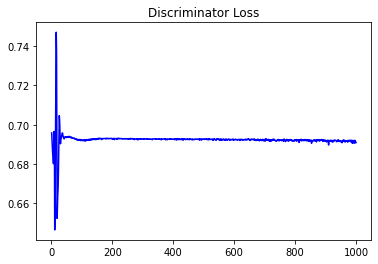

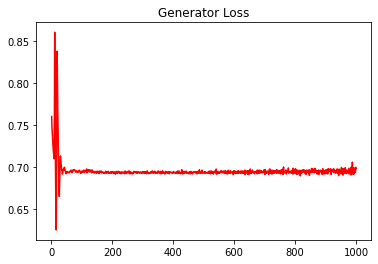

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.07863450877659679


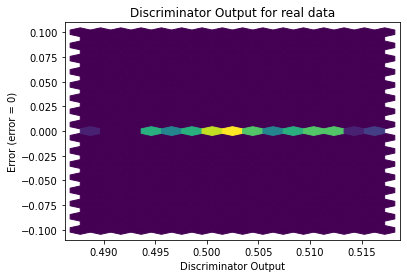

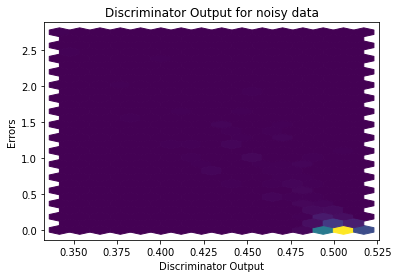

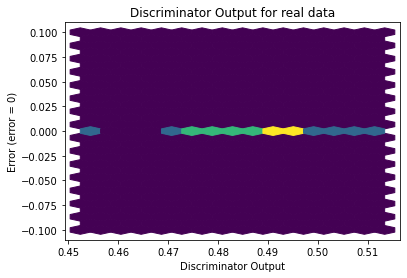

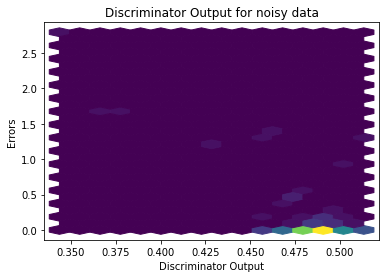

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


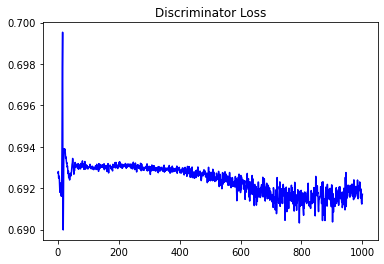

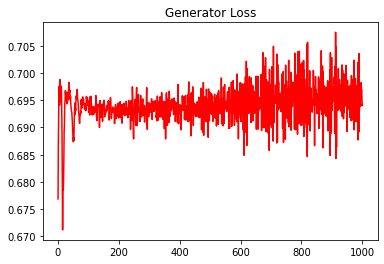

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.10063491666975405


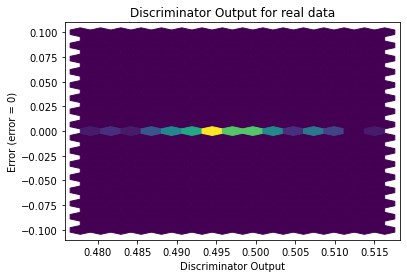

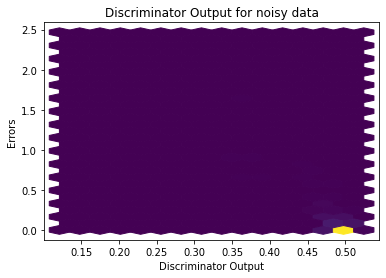

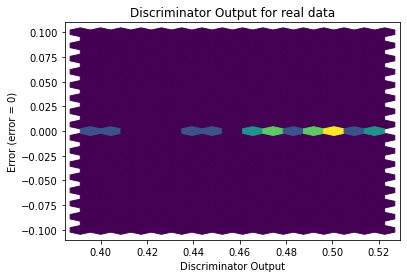

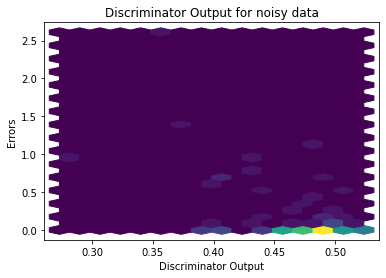

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1013]], requires_grad=True)
